# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as numpy
import random
import statistics as st
import pandas as pd

# Reading Data

In [2]:
dataset = pd.read_csv("extracted_data.csv")
data = pd.DataFrame(dataset).transpose()
print(data)

               0        1        2        3          4        5        6      \
ID_REF     1007_s_at  1053_at   117_at   121_at  1255_g_at  1294_at  1316_at   
GSM483297    131.177  298.046  30.3622  196.126    8.91341  225.835  31.1193   
GSM483298    74.0353  324.338  27.2901  224.344    9.14145  156.923  33.7321   
GSM483299    93.8216   329.58  26.0406  148.804     7.7633  154.658  41.0021   
GSM483300    85.6388  337.625  21.2796  202.724    9.35389  168.734  35.6482   
...              ...      ...      ...      ...        ...      ...      ...   
GSM483492    106.686  315.553  24.8783  136.372    7.50435  526.474  38.2872   
GSM483493     100.45  298.958  22.0567  145.487    7.93972  431.891  34.2756   
GSM483494    104.458  282.023   22.597  120.331    8.46268  397.818  32.9989   
GSM483495    123.223  217.978  23.4974   138.37    7.49847  500.396  32.4385   
GSM483496    156.999  270.676  17.8322  150.195    7.73316  435.802  34.2253   

             7          8        9     

In [3]:
index = data.index
row = data.iloc[200]
print(row)

0        156.999
1        270.676
2        17.8322
3        150.195
4        7.73316
          ...   
54671    98.9596
54672    7.45222
54673    8.83629
54674    10.0189
54675        NaN
Name: GSM483496, Length: 54676, dtype: object


In [4]:
a = 2
print(a)
a = numpy.nan
print(numpy.isnan(a))


2
True


# Delete few datas

In [5]:
miss_data = []
for gene in range(1, 201) :
     values = data.iloc[gene]
     size = len(values)
     f = .1 # 10 % of data
     del_index = random.sample(range(1,size), int(f*size))
     for i in del_index :
         values[i] = numpy.nan
     no_of_null = 0
     for i in values :
         if numpy.isnan(i) :
             no_of_null = no_of_null + 1
     print(f"{gene} : {no_of_null}")
     d = {}
     d['gene'] = index[gene]
     d['values'] = values
     miss_data.append(d)
# print(miss_data)


1 : 5468
2 : 5468
3 : 5468
4 : 5468
5 : 5468
6 : 5468
7 : 5468
8 : 5468
9 : 5468
10 : 5468
11 : 5468
12 : 5468
13 : 5467
14 : 5467
15 : 5468
16 : 5468
17 : 5468
18 : 5468
19 : 5468
20 : 5468
21 : 5468
22 : 5468
23 : 5468
24 : 5468
25 : 5468
26 : 5467
27 : 5468
28 : 5468
29 : 5468
30 : 5468
31 : 5468
32 : 5468
33 : 5468
34 : 5468
35 : 5468
36 : 5468
37 : 5468
38 : 5468
39 : 5468
40 : 5468
41 : 5467
42 : 5468
43 : 5468
44 : 5468
45 : 5467
46 : 5467
47 : 5468
48 : 5468
49 : 5468
50 : 5468
51 : 5468
52 : 5468
53 : 5468
54 : 5468
55 : 5468
56 : 5468
57 : 5468
58 : 5468
59 : 5468
60 : 5468
61 : 5468
62 : 5468
63 : 5468
64 : 5468
65 : 5468
66 : 5468
67 : 5468
68 : 5468
69 : 5468
70 : 5468
71 : 5468
72 : 5468
73 : 5468
74 : 5468
75 : 5468
76 : 5468
77 : 5468
78 : 5468
79 : 5468
80 : 5468
81 : 5468
82 : 5468
83 : 5468
84 : 5468
85 : 5468
86 : 5468
87 : 5468
88 : 5468
89 : 5468
90 : 5468
91 : 5468
92 : 5468
93 : 5468
94 : 5468
95 : 5468
96 : 5468
97 : 5468
98 : 5468
99 : 5468
100 : 5468
101 : 54

# calculate mean using confidence interval


In [6]:
miss_data[199]

{'gene': 'GSM483496',
 'values': 0        156.999
 1        270.676
 2        17.8322
 3        150.195
 4        7.73316
           ...   
 54671    98.9596
 54672    7.45222
 54673    8.83629
 54674    10.0189
 54675        NaN
 Name: GSM483496, Length: 54676, dtype: object}

In [7]:
calculated_means = []
for gene in range(200) :
    population = miss_data[gene]['values']
    # print(population)
    sample_means = []
    sample_size = 100
    for i in range(500) :
        sample = []
        while(len(sample) < sample_size) :
            d = random.choice(population) 
            if not numpy.isnan(d) :
                sample.append(d)
        sample_means.append(st.mean(sample))
    # print(sample_means)
    expectation_of_sample_mean = st.mean(sample_means)
    std_deviation_of_sample_mean = st.stdev(sample_means)
    population_mean = population.mean()
    population_deviation = population.std()

    scores = [0]*1000
    z = 1 # for 90% significance interval

    for mean in sample_means :
        u = (int)(mean + z*std_deviation_of_sample_mean)
        l = (int)(mean - z*std_deviation_of_sample_mean)
        for datapoint in range(l,u) :
            if datapoint in range(len(scores)) :
                scores[datapoint] += 1
    # print(scores)

    best = max(scores)
    # print(best)
    lower_bound , upper_bound = 0, 0
    for index, score in enumerate(scores) :
        if best == score :
            lower_bound = index 
            break 
    for index, score in enumerate(scores) :
        if best == score and index >= lower_bound :
            upper_bound = index  
    
    m = (lower_bound + upper_bound) / 2
    for i in range(len(population)) : # imputation loop
        if numpy.isnan(population[i]) :
            population[i] = m
    nonull = 0
    for val in population :
        if numpy.isnan(val) :
            nonull = nonull + 1
    calculated_means.append(pd.DataFrame.mean(population))
    

print(calculated_means)


[217.72131301124145, 221.0810996181779, 223.20204563937054, 219.13221726984304, 215.24578569558417, 216.59131131540073, 206.16559989182392, 197.02793281961203, 220.6151597771505, 202.2095886773469, 201.05909976320515, 210.0976683076488, 193.07212636467446, 172.06578315881086, 206.1829925626901, 228.42831462202216, 198.5788979443316, 213.23514683191922, 213.84488250847272, 221.4732942798203, 204.5761852623003, 219.89930708329044, 216.31702189510378, 216.1388184615335, 209.80492402222663, 213.70237469277728, 210.8793526478846, 221.81357787308832, 225.83578468360122, 196.76661878360594, 196.3545772668341, 191.1179534577462, 191.6215873941492, 202.05184984434183, 192.38763135641474, 203.85157487340527, 210.51391703755462, 210.31540408221676, 213.43554291109479, 216.30094374889558, 220.82886070164173, 229.2723004759596, 215.15003692916483, 222.15683713382774, 231.27803912508827, 219.26306390137447, 224.28293246248157, 224.36915463263966, 215.22668881783179, 225.87382051550068, 215.820598420

               0        1        2        3          4        5        6      \
ID_REF     1007_s_at  1053_at   117_at   121_at  1255_g_at  1294_at  1316_at   
GSM483297    131.177  298.046  30.3622  196.126    8.91341  225.835  31.1193   
GSM483298    74.0353  324.338  27.2901  224.344    9.14145  156.923  33.7321   
GSM483299    93.8216   329.58  26.0406  148.804     7.7633  154.658  41.0021   
GSM483300    85.6388  337.625  21.2796  202.724    9.35389  168.734  35.6482   
...              ...      ...      ...      ...        ...      ...      ...   
GSM483492    106.686  315.553  24.8783  136.372    7.50435  526.474  38.2872   
GSM483493     100.45  298.958  22.0567  145.487    7.93972  431.891  34.2756   
GSM483494    104.458  282.023   22.597  120.331    8.46268  397.818  32.9989   
GSM483495    123.223  217.978  23.4974   138.37    7.49847  500.396  32.4385   
GSM483496    156.999  270.676  17.8322  150.195    7.73316  435.802  34.2253   

             7          8        9     

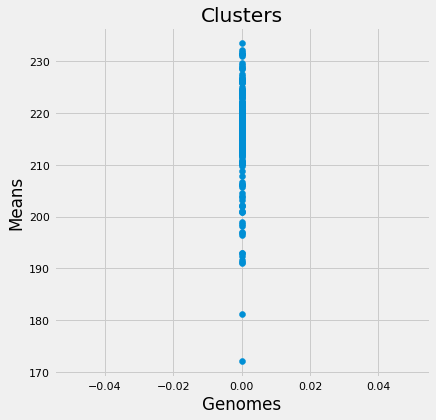

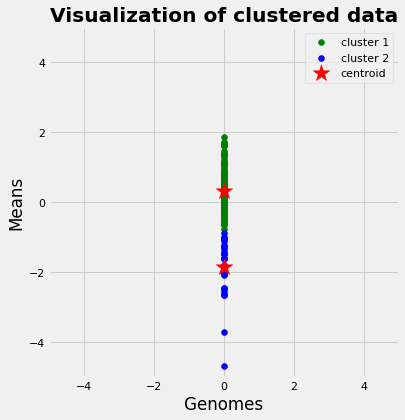

In [8]:

dataset = pd.read_csv("extracted_data.csv")
data = pd.DataFrame(dataset).transpose()
print(data)


# # Finding Mean

# In[3]:


# print(data.index)
index = data.index
mean_data = []
for i, gene in enumerate(index[1:]) :
    d = {}
    d['gene'] = gene
    d['mean'] = calculated_means[i]
    mean_data.append(d)        
print(mean_data)


# # Calculating Mean

# In[4]:


import csv

fields = ["gene", "mean"]
with open("imputed_data_unlabelled2.csv", "w") as file :
    writer = csv.DictWriter(file, fieldnames= fields)
    writer.writeheader()
    writer.writerows(mean_data)


# In[5]:


data2 = pd.DataFrame(mean_data)
print(type(data2))
print(type(data2.iloc[0:,0][0]))
for i,genes in enumerate(data2.iloc[0:,0]) :
    data2.iloc[0:,0][i] = 0

print(data2['mean'].tolist())


# # Scatter Plot

# In[6]:


import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


plt.figure(figsize=(6,6))
plt.scatter(data2.iloc[0:,0], data2.iloc[0:,1])
plt.xlabel('Genomes')
plt.ylabel('Means')
plt.title('Clusters')
plt.show()


# # Clustering

# In[7]:


from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# Standardize the data
X_std = StandardScaler().fit_transform(data2)

# Run local implementation of kmeans
Km = KMeans(n_clusters=2, max_iter=100)
km = Km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('Genomes')
plt.ylabel('Means')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')


# In[11]:


label = km.labels_
index = data.index
mean_data2 = []
for i, gene in enumerate(index[1:]) :
    d = {}
    d['gene'] = gene
    d['mean'] = calculated_means[i]
    d['label'] = label[i]
    mean_data2.append(d)        

fields = ["gene", "mean", 'label']
with open("imputed_data2.csv", "w") as file :
    writer = csv.DictWriter(file, fieldnames= fields)
    writer.writeheader()
    writer.writerows(mean_data2)



# RESULTS

In [9]:
label

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [10]:
dataset1 = pd.read_csv("full_data.csv")
label1 = pd.DataFrame(dataset1)['label']
print(numpy.array(label1))
dataset2 = pd.read_csv("imputed_data2.csv")
label2 = pd.DataFrame(dataset2)['label']
print(numpy.array(label2))
result = 0
for i in range(200) :
    if label1[i] == label2[i] :
        result = result + 1
print(f"\n\nlabels matches = {result}") 

[0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


labels matches = 198
